<a href="https://colab.research.google.com/github/raianasousa/MatrizRICE/blob/main/MatrizRice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

Por favor, selecione o arquivo .csv com as features para priorizar:


Saving MatrizRICEExemplo - Dados.csv to MatrizRICEExemplo - Dados.csv

Arquivo 'MatrizRICEExemplo - Dados.csv' carregado com sucesso! Processando...

--- Features Priorizadas pelo RICE Score ---
                           Feature  Reach  Impact  Confidence  Effort  \
0             Reformular dashboard    300       2          20      30   
1  Integrar com outras plataformas      0       1         100      90   

   RICE_Score  
0         4.0  
1         0.0  

Arquivo 'features_priorizadas.csv' salvo com sucesso!
Gráfico 'matriz_rice.png' salvo com sucesso!

Você pode baixar os arquivos gerados no menu à esquerda.


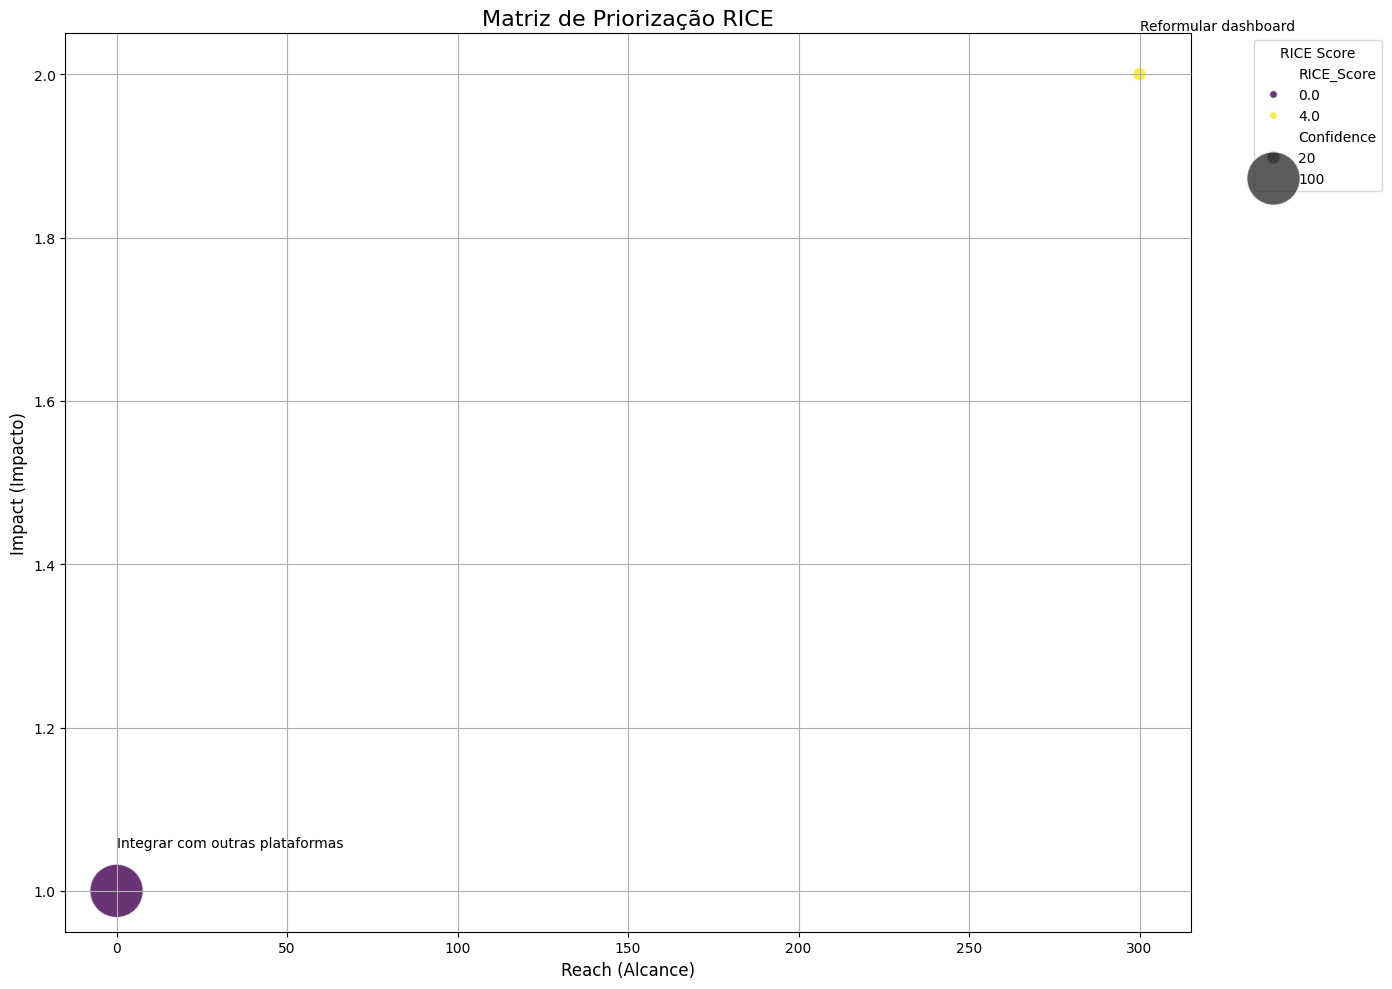

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files # Módulo para upload interativo
import io

# --- Seção de Upload Interativo ---
print("Por favor, selecione o arquivo .csv com as features para priorizar:")
uploaded = files.upload()

# Verifica se algum arquivo foi realmente enviado
if not uploaded:
    print("\nNenhum arquivo foi selecionado. A execução foi cancelada.")
else:
    # Pega o nome e o conteúdo do arquivo enviado
    nome_do_arquivo = list(uploaded.keys())[0]
    conteudo_do_arquivo = uploaded[nome_do_arquivo]
    print(f"\nArquivo '{nome_do_arquivo}' carregado com sucesso! Processando...")

    try:
        # Lê os dados do arquivo em memória para um DataFrame do Pandas
        df = pd.read_csv(io.BytesIO(conteudo_do_arquivo))

        # Verifica se as colunas essenciais estão presentes
        colunas_necessarias = ['Feature', 'Reach', 'Impact', 'Confidence', 'Effort']
        if not all(coluna in df.columns for coluna in colunas_necessarias):
            print("\nERRO: A planilha não contém todas as colunas necessárias.")
            print(f"Verifique se as colunas {colunas_necessarias} existem no seu arquivo.")
        else:
            # --- Lógica do RICE Score ---

            # Calcula o Score RICE
            df['RICE_Score'] = (df['Reach'] * df['Impact'] * (df['Confidence'] / 100)) / df['Effort']

            # Ordena as features pelo Score RICE em ordem decrescente
            df_prioritized = df.sort_values(by='RICE_Score', ascending=False)

            # Exibe o resultado na tela
            print("\n--- Features Priorizadas pelo RICE Score ---")
            print(df_prioritized)

            # Salva o resultado em um novo arquivo CSV
            df_prioritized.to_csv('features_priorizadas.csv', index=False)
            print("\nArquivo 'features_priorizadas.csv' salvo com sucesso!")

            # --- Criação do Gráfico de Matriz RICE ---

            plt.figure(figsize=(14, 10))
            sns.scatterplot(
                data=df_prioritized,
                x='Reach',
                y='Impact',
                size='Confidence',
                hue='RICE_Score', # Colorir pelo score final destaca as prioridades
                sizes=(100, 1500),
                palette='viridis',
                alpha=0.8
            )

            # Adiciona os nomes das features no gráfico
            for i in range(df_prioritized.shape[0]):
                plt.text(
                    x=df_prioritized['Reach'].iloc[i],
                    y=df_prioritized['Impact'].iloc[i] + 0.05,
                    s=df_prioritized['Feature'].iloc[i],
                    fontdict=dict(color='black', size=10),
                    ha='left',
                    va='bottom'
                )

            plt.title('Matriz de Priorização RICE', fontsize=16)
            plt.xlabel('Reach (Alcance)', fontsize=12)
            plt.ylabel('Impact (Impacto)', fontsize=12)
            plt.legend(title='RICE Score', bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.grid(True)
            plt.tight_layout()

            # Salva o gráfico como uma imagem
            plt.savefig('matriz_rice.png')
            print("Gráfico 'matriz_rice.png' salvo com sucesso!")
            print("\nVocê pode baixar os arquivos gerados no menu à esquerda.")

    except Exception as e:
        print(f"\nOcorreu um erro ao processar o arquivo: {e}")
        print("Verifique se o arquivo está no formato CSV correto.")